### Bilateral Filter

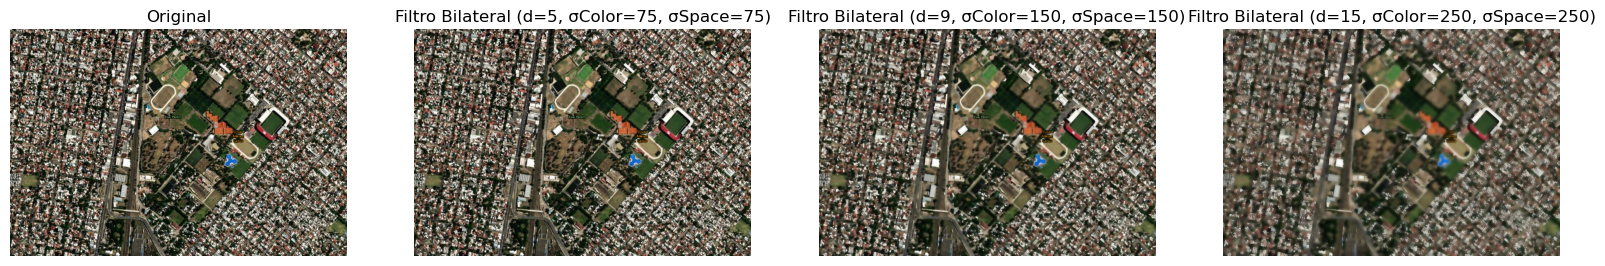

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Leer la imagen en color
imagen = cv2.imread("lanus.png")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Aplicar filtro bilateral con diferentes parámetros
filtro1 = cv2.bilateralFilter(imagen_rgb, d=5, sigmaColor=75, sigmaSpace=75)
filtro2 = cv2.bilateralFilter(imagen_rgb, d=9, sigmaColor=150, sigmaSpace=150)
filtro3 = cv2.bilateralFilter(imagen_rgb, d=15, sigmaColor=250, sigmaSpace=250)

# Mostrar la imagen original y las imágenes filtradas
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(imagen_rgb)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(filtro1)
axes[1].set_title("Filtro Bilateral (d=5, σColor=75, σSpace=75)")
axes[1].axis("off")

axes[2].imshow(filtro2)
axes[2].set_title("Filtro Bilateral (d=9, σColor=150, σSpace=150)")
axes[2].axis("off")

axes[3].imshow(filtro3)
axes[3].set_title("Filtro Bilateral (d=15, σColor=250, σSpace=250)")
axes[3].axis("off")

plt.show()

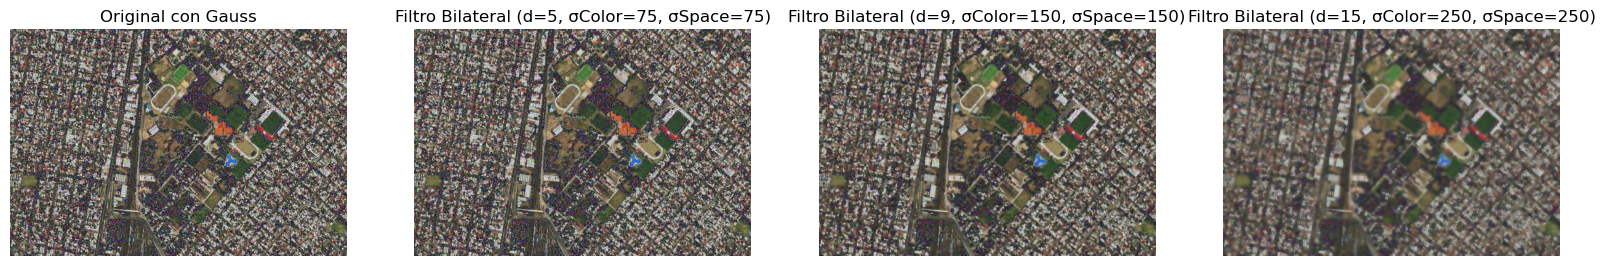

In [11]:
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = add_gaussian_noise(imagen_rgb, 0, 25, 70)

# Aplicar filtro bilateral con diferentes parámetros
filtro1 = cv2.bilateralFilter(imagen_ruido_gaussiano, d=5, sigmaColor=75, sigmaSpace=75)
filtro2 = cv2.bilateralFilter(imagen_ruido_gaussiano, d=9, sigmaColor=150, sigmaSpace=150)
filtro3 = cv2.bilateralFilter(imagen_ruido_gaussiano, d=15, sigmaColor=250, sigmaSpace=250)

# Mostrar la imagen original y las imágenes filtradas
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(imagen_ruido_gaussiano)
axes[0].set_title("Original con Gauss")
axes[0].axis("off")

axes[1].imshow(filtro1)
axes[1].set_title("Filtro Bilateral (d=5, σColor=75, σSpace=75)")
axes[1].axis("off")

axes[2].imshow(filtro2)
axes[2].set_title("Filtro Bilateral (d=9, σColor=150, σSpace=150)")
axes[2].axis("off")

axes[3].imshow(filtro3)
axes[3].set_title("Filtro Bilateral (d=15, σColor=250, σSpace=250)")
axes[3].axis("off")

plt.show()

## Conclusiones

- **Efectividad del Filtro Bilateral en la Imagen Original**:
   - En la imagen sin ruido, el filtro bilateral suaviza las áreas uniformes manteniendo los bordes. A medida que aumentan los valores de `d`, `sigmaColor`, y `sigmaSpace`, se observa un mayor nivel de suavizado, pero con una perdida en los bordes.

- **Efectividad del Filtro Bilateral en la Imagen con Ruido**:
   - En la imagen con ruido, el filtro bilateral ayuda a reducir el ruido gaussiano preservando en gran medida los bordes. Los parámetros más altos (`d=15`, `sigmaColor=250`, `sigmaSpace=250`) suavizan mejor el ruido, pero se ve que pierde mucho la nitidez de la imagen.
   - La versión con valores intermedios (`d=9`, `sigmaColor=150`, `sigmaSpace=150`) parece ser la que provee un mejor equilibrio entre la reducción de ruido y la preservación de los detalles en la imagen.
